In [1]:
require(kohonen)
set.seed(1)
col.pal <- rep(c("#771155", "#AA4488", "#CC99BB", "#114477", "#4477AA", "#77AADD", "#117777", "#44AAAA", 
                 "#77CCCC", "#117744", "#44AA77", "#88CCAA", "#777711", "#AAAA44", "#DDDD77", "#774411", 
                 "#AA7744", "#DDAA77", "#771122", "#AA4455", "#DD7788"),2)

Loading required package: kohonen


## Clean data set

In [2]:
set.seed(3)
d.all <- read.csv(file.path("..","data", "final", "clean.csv"))
d.all <- d.all[!is.na(d.all$var_lc),]

sample_size <- floor(0.75 * nrow(d.all))

d.train_ind <- sample(seq_len(nrow(d.all)), size = sample_size)

d.train <- d.all[d.train_ind, ]
d.test  <- d.all[-d.train_ind, ]

head(d.all)

ID,magnitude,Cadence,duration,latitude,longitude,Teff,Teff_error,logg,logg_error,Type,var_lc,num_peaks,median_peaks,mad_peaks
1,16.8,1800,27.38,9.84,108.10,4354,300,-999.00,-999.00,Trans/Eclipse,2.572494e+00,2,29.86858,41.75269
2,6.0,1800,82.17,65.38,108.08,8000,200,-999.00,-999.00,Trans/Eclipse,9.459850e+05,19,57.12909,55.69576
3,15.5,1800,27.37,49.41,246.24,2754,250,-999.00,-999.00,LPV;MIRA,2.589982e+02,2,31.12475,11.37836
4,13.8,120,27.40,42.44,226.11,16160,130,3.91,0.16,SPB,4.066555e+01,9,127.49338,68.59015
5,14.6,20,27.40,52.68,180.44,8000,200,-999.00,-999.00,Trans/Eclipse,1.204713e-01,611,4899.64632,4507.44102
6,10.3,1800,54.79,40.29,283.81,2780,250,-999.00,-999.00,LPV;MIRA,6.048815e+06,2,28.92632,14.50562


In [3]:
d.train.X <- d.train[, c("magnitude", "Teff", "logg", "var_lc", "num_peaks", "median_peaks", "mad_peaks")]
d.train.X <- scale(d.train.X)

d.test.X <- d.test[, c("magnitude", "Teff", "logg", "var_lc", "num_peaks", "median_peaks", "mad_peaks")]
d.test.X <- scale(d.test.X)

d.som <- xyf(d.train.X, d.train$Type, grid = somgrid(20,20,"hexagonal"))

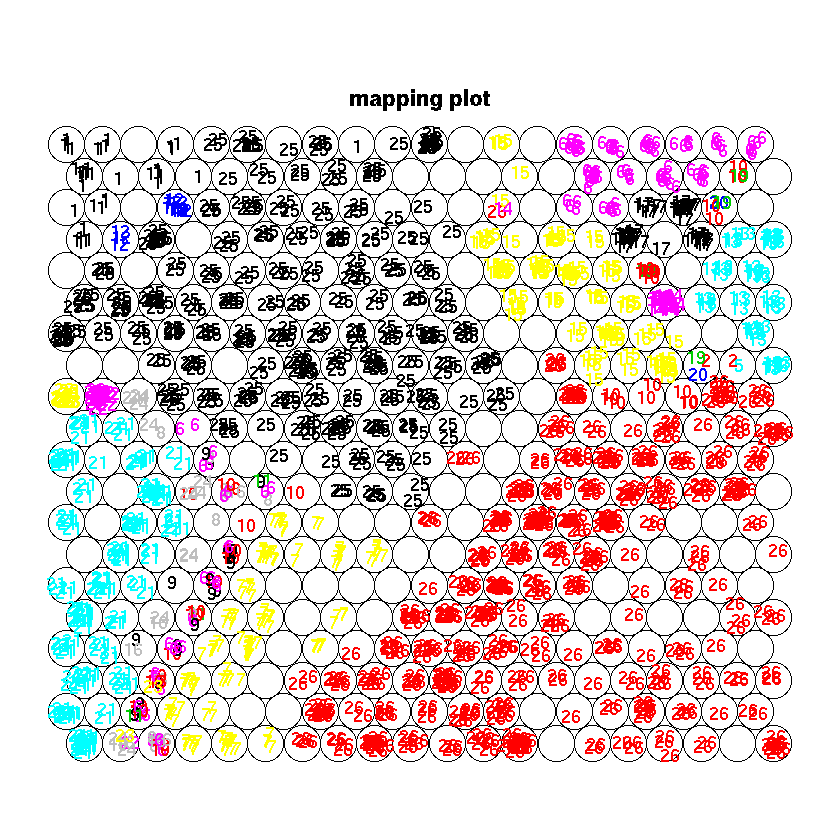

In [4]:
plot(d.som, type="mapping",
     labels = as.integer(d.train$Type), col = as.integer(d.train$Type),
     main = "mapping plot")

## Noisy data set

In [5]:
set.seed(3)
d.all <- read.csv(file.path("..","data", "final", "noisy.csv"))
d.all <- d.all[!is.na(d.all$var_lc),]

sample_size <- floor(0.75 * nrow(d.all))

d.train_ind <- sample(seq_len(nrow(d.all)), size = sample_size)

d.train <- d.all[d.train_ind, ]
d.test  <- d.all[-d.train_ind, ]

In [6]:
d.train.X <- d.train[, c("magnitude", "Teff", "logg", "var_lc", "num_peaks", "median_peaks", "mad_peaks")]
d.train.X <- scale(d.train.X)

d.test.X <- d.test[, c("magnitude", "Teff", "logg", "var_lc", "num_peaks", "median_peaks", "mad_peaks")]
d.test.X <- scale(d.test.X)

d.som <- xyf(d.train.X, d.train$Type, grid = somgrid(20,20,"hexagonal"))

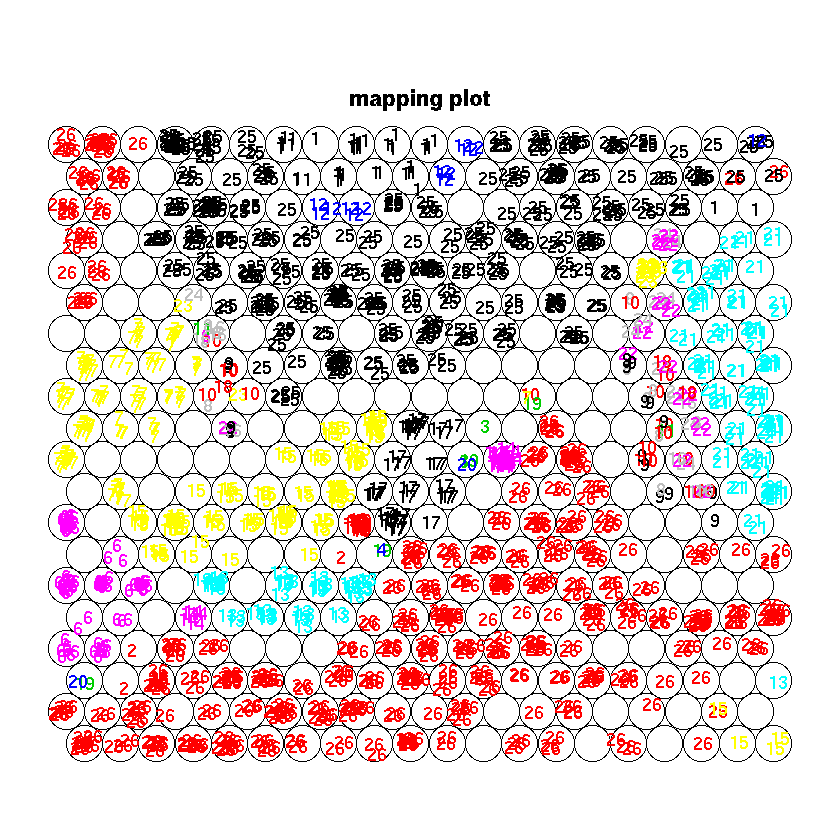

In [7]:
plot(d.som, type="mapping",
     labels = as.integer(d.train$Type), col = as.integer(d.train$Type),
     main = "mapping plot")